In [1]:
# CNN에서 필요한 라이브러리 IMPORT
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Flatten, Dense, Input, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop# 평균적으로 높은 효율을 내는 알고리즘
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
# Dataset 디렉토리 정의
train_dir = "../data/cats_and_dogs/cats_and_dogs/train"
test_dir = "../data/cats_and_dogs/cats_and_dogs/test"

In [6]:
# ImageDataGenerator 생성
train_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255)

In [7]:
# ImageDataGenerator 설정
train_generator = train_datagen.flow_from_directory(
    train_dir,  # 학습용 이미지를 가져올 폴더명
    classes=["cats", "dogs"],    # cats 폴더의 image는 label을 0으로
                                 # dogs 폴더의 image는 label을 1로 설정한다.
    target_size=(150,150),       # 이미지를 (150, 150)를 resize
    batch_size=20,               # 한번에 20개의 이미지만 가져와요!
    class_mode="binary"          # 이진분류인 경우 binary 설정
)

# ImageDataGenerator 설정
test_generator = test_datagen.flow_from_directory(
    test_dir,  # 평가용 이미지를 가져올 폴더명
    classes=["cats", "dogs"],    # cats 폴더의 image는 label을 0으로
                                 # dogs 폴더의 image는 label을 1로 설정한다.
    target_size=(150,150),       # 이미지를 (150, 150)를 resize
    batch_size=20,               # 한번에 20개의 이미지만 가져와요!
    class_mode="binary"          # 이진분류인 경우 설정
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [8]:
# CNN Model 구현
model = Sequential()

model.add(Input(shape=(150, 150, 3)))  # 입력 정의
# Conv Block 1
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Conv Block 2
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Conv Block 3
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Conv Block 4
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Fully Connection(DNN)의 input_layer
# FC + Dropout
model.add(Flatten())  # 전체 데이터를 4차원에서 2차원으로 변경
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))  # 과적합 방지

# 출력층 (binary classification)
model.add(Dense(1, activation='sigmoid'))

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# model이 어떻게 동작하는지를 지정
model.compile(optimizer=RMSprop(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [11]:
# 설정이 다 되었으면 모델을 학습.
hist = model.fit(train_generator,
          steps_per_epoch=100,
          epochs=30,
          verbose=1,
          validation_data=test_generator,
          validation_steps=50)

C:\Users\user\anaconda3\envs\python\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 33s 322ms/step - accuracy: 0.5067 - loss: 0.6947 - val_accuracy: 0.5230 - val_loss: 0.6887
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 14s 143ms/step - accuracy: 0.5698 - loss: 0.6804 - val_accuracy: 0.5480 - val_loss: 0.6829
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 14s 144ms/step - accuracy: 0.5613 - loss: 0.6705 - val_accuracy: 0.5960 - val_loss: 0.6650
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 15s 145ms/step - accuracy: 0.6079 - loss: 0.6515 - val_accuracy: 0.6410 - val_loss: 0.6392
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 14s 144ms/step - accuracy: 0.6411 - loss: 0.6244 - val_accuracy: 0.6840 - val_loss: 0.6173
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 15s 145ms/step - accuracy: 0.6809 - loss: 0.5900 - val_accuracy: 0.6790 - val_loss: 0.6076
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 15s 145ms/step - accuracy: 0.6659 - loss: 0.5921 - val_accuracy: 0.6700 - val_loss: 0.6121
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 15s 145ms/step - accuracy: 0.7044 - loss: 0

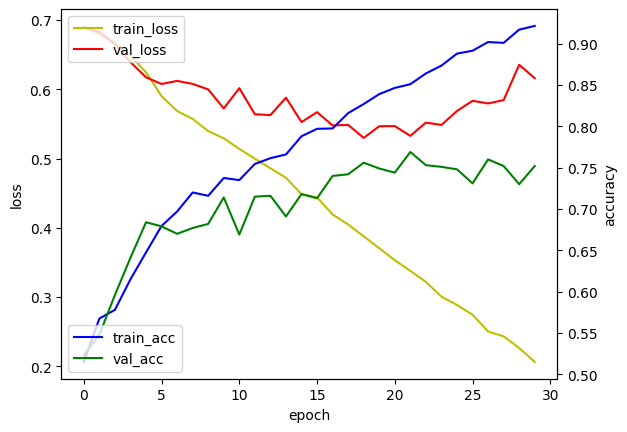

In [12]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
loss_ax.plot(hist.history["loss"], "y", label="train_loss")
loss_ax.plot(hist.history["val_loss"], "r", label="val_loss")
loss_ax.set_xlabel("epoch")
loss_ax.set_ylabel("loss")
loss_ax.legend(loc="upper left")

acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history["accuracy"], "b", label="train_acc")
acc_ax.plot(hist.history["val_accuracy"], "g", label="val_acc")
acc_ax.set_ylabel("accuracy")
acc_ax.legend(loc="lower left")

In [13]:
score = model.evaluate(test_generator)
print(score)

50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.7619 - loss: 0.6128
[0.6159912347793579, 0.7519999742507935]


In [17]:
validation_dir = "../data/cats_and_dogs/cats_and_dogs/validation"
validation_datagen = ImageDataGenerator(rescale=1/255)
# ImageDataGenerator 설정
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,  # 평가용 이미지를 가져올 폴더명
    classes=["cats", "dogs"],    # cats 폴더의 image는 label을 0으로
                                 # dogs 폴더의 image는 label을 1로 설정한다.
    target_size=(150,150),       # 이미지를 (150, 150)를 resize
    batch_size=20,               # 한번에 20개의 이미지만 가져와요!
    class_mode="binary")         # 이진분류인 경우 설정
    
score = model.evaluate(validation_generator)
print(score)

Found 1000 images belonging to 2 classes.
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 204ms/step - accuracy: 0.7356 - loss: 0.6134
[0.6183441877365112, 0.7429999709129333]
